In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [3]:
(X_train,y_train),(X_test,y_test)= keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape #before flattened

(28, 28)

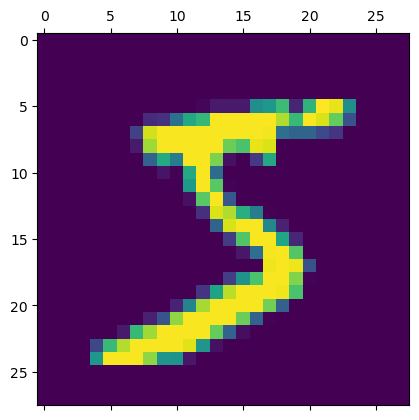

In [7]:
plt.matshow(X_train[0])

In [8]:
X_train=X_train/255                   
X_test=X_test/255

In [9]:
X_train_flattened =X_train.reshape(len(X_train), 28*28)
X_test_flattened= X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape   #after flattened the shape  #we have 60k photo and each photo have 784 pixle 

(60000, 784)

In [11]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

very simple neural network with no hidden layer

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')   #idhar ham input-output layer bana liya. 10 = output size 
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',   #loss fuction idhar sparse catergorical use ho rha hai kyuki outout 1,2,3,.. hai   
              metrics=['accuracy'])                       # agar biinary hota toh catergorical loss function hota
model.fit(X_train_flattened,y_train,epochs=5)

C:\Users\trish\ANACONDA\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8051 - loss: 0.7307
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9131 - loss: 0.3071
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9198 - loss: 0.2849
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9224 - loss: 0.2745
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9272 - loss: 0.2633


In [13]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9141 - loss: 0.3067


[0.26881659030914307, 0.9251999855041504]

In [14]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3.9700307e-02, 3.6208914e-07, 5.0284009e-02, 9.5223832e-01,
       1.8840620e-03, 1.1053797e-01, 2.2719164e-06, 9.9978089e-01,
       1.4199486e-01, 6.9295013e-01], dtype=float32)

In [15]:
np.argmax(y_predicted[0])

7

In [16]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [17]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [18]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    1,    0,    5,    7,    3,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   6,    8,  929,   13,    6,    4,   11,   10,   40,    5],
       [   5,    0,   21,  903,    0,   32,    2,   11,   29,    7],
       [   1,    1,    7,    1,  892,    0,   13,    5,   13,   49],
       [  12,    2,    5,   19,    9,  781,   16,    7,   34,    7],
       [  13,    3,    7,    1,    7,   10,  912,    2,    3,    0],
       [   1,    5,   24,    5,    2,    0,    0,  952,    4,   35],
       [   7,    7,    7,   17,    9,   21,    9,   11,  879,    7],
       [  11,    7,    1,    8,   15,    6,    0,   20,    9,  932]])>